# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.20 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
import random
import torch
from collections import deque
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

from maddpg import Group

In [11]:
def maddpg(n_episodes=1000, max_t=1000, train_mode=False, score_target=float("inf"), print_every=100):

    scores = []
    moving_averages = []
    scores_window = deque(maxlen=1000)
    
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=train_mode)[brain_name]
        states = env_info.vector_observations

        agents.reset_noise()
        episode_scores = np.zeros(num_agents)

        while True:
            
            actions = agents.act(states)
            env_info = env.step(actions)[brain_name]
            
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            if train_mode:
                agents.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            episode_scores += np.array(rewards)
            
            if np.any(dones):
                break 
        
        score = episode_scores.max()
        scores_window.append(score)
        scores.append(score)
        moving_averages.append(np.mean(scores_window))
        
        print('\rEpisode {}\tAverage Score: {:.3f}\tMoving Avg: {:.3f}'.format(i_episode, np.mean(scores_window), moving_averages[-1]), end="")
#         timestamp = dt.now().strftime("%Y-%m-%d_%H:%M:%S")
#         torch.save(agents.checkpoint(), f'checkpoint_{timestamp}.pth')
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        if np.mean(scores_window)>=score_target:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agents.checkpoint(), 'checkpoint_final.pth')
            break
            
    return scores, moving_averages

In [12]:
agents = Group(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=0)

In [13]:
%%time
scores, moving_averages = maddpg(n_episodes=4000, train_mode=True, score_target=0.5)

Episode 100	Average Score: 0.000	Moving Avg: 0.000
Episode 200	Average Score: 0.001	Moving Avg: 0.001
Episode 300	Average Score: 0.003	Moving Avg: 0.003
Episode 400	Average Score: 0.002	Moving Avg: 0.002
Episode 500	Average Score: 0.003	Moving Avg: 0.003
Episode 600	Average Score: 0.016	Moving Avg: 0.006
Episode 700	Average Score: 0.013	Moving Avg: 0.013
Episode 800	Average Score: 0.029	Moving Avg: 0.019
Episode 900	Average Score: 0.023	Moving Avg: 0.023
Episode 1000	Average Score: 0.034	Moving Avg: 0.034
Episode 1100	Average Score: 0.076	Moving Avg: 0.066
Episode 1200	Average Score: 0.119	Moving Avg: 0.109
Episode 1300	Average Score: 0.278	Moving Avg: 0.268
Episode 1400	Average Score: 0.439	Moving Avg: 0.429
Episode 1467	Average Score: 0.500	Moving Avg: 0.500
Environment solved in 1467 episodes!	Average Score: 0.50
CPU times: user 1h 13min 25s, sys: 2min 53s, total: 1h 16min 18s
Wall time: 1h 20min 8s


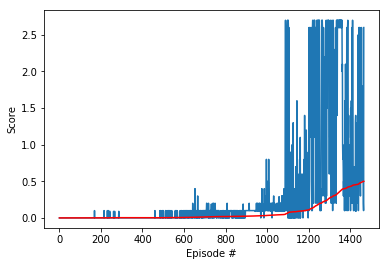

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='maddpg')
plt.plot(np.arange(len(scores)), moving_averages, c='r', label='mov avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig("plot.jpg")
plt.show()

## Run Agent

In [17]:
agents = Group(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=0)

checkpoints = torch.load('checkpoint_final.pth')

for i_agent, checkpoint in enumerate(checkpoints):
    agents.agents[i_agent].actor_local.load_state_dict(checkpoint['actor'])
    agents.agents[i_agent].critic_local.load_state_dict(checkpoint['critic'])

scores, _ = maddpg(n_episodes=1, train_mode=False)
scores


Episode 1	Average Score: 2.600	Moving Avg: 2.600

[2.6000000387430191]

In [18]:
env.close()